In [1]:
# EXP 3: TRAIN = AUGMENTED , VAL = AUGMENTED, TEST = REAL 
# 800 IMAGES PER CLASS WHERE THE DOMINANT IS THE REAL (60-40 FOR THE NORMAL CLASS) 

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
# TRAIN AND VAL SET (AUGMENTED)
train_data = tf.keras.utils.image_dataset_from_directory(r"E:\bachelor\speed bumps (augmented2)\augmented", batch_size= 100)
data_iterator = train_data.as_numpy_iterator()
batch = data_iterator.next()

Found 1600 files belonging to 2 classes.


In [4]:
data = train_data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.56572   , 0.45067713, 0.4586428 ],
          [0.289748  , 0.24661076, 0.23092447],
          [0.45718253, 0.45800972, 0.4683345 ],
          ...,
          [0.27846846, 0.28239003, 0.25886062],
          [0.2536681 , 0.25758967, 0.2262171 ],
          [0.26414388, 0.26806545, 0.2366929 ]],
 
         [[0.2477697 , 0.17699023, 0.16038483],
          [0.31890342, 0.27576616, 0.2600799 ],
          [0.17863435, 0.17554644, 0.20068671],
          ...,
          [0.24776827, 0.25168982, 0.22816043],
          [0.25372937, 0.25765094, 0.23412153],
          [0.23034573, 0.2342673 , 0.21073788]],
 
         [[0.16264074, 0.14900932, 0.12985672],
          [0.20142703, 0.18040986, 0.1766415 ],
          [0.13784611, 0.13182133, 0.18627451],
          ...,
          [0.2451179 , 0.24778335, 0.2164108 ],
          [0.2313065 , 0.23256262, 0.2209511 ],
          [0.24036913, 0.2442907 , 0.22403732]],
 
         ...,
 
         [[0.56121707, 0.54945236, 0.5166705 ],
          [0.77766

In [5]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)+1

In [6]:
len(data)

16

In [7]:
val_size

4

In [8]:
train_size

12

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [16]:
# TEST SET (REAL)
test_data = tf.keras.utils.image_dataset_from_directory(r"E:\bachelor\speed bumps (augmented2)\real", batch_size= 100)
data_iterator = test_data.as_numpy_iterator()
batch1 = data_iterator.next()

Found 406 files belonging to 2 classes.


In [17]:
test_data = test_data.map(lambda x,y: (x/255, y))
test_data.as_numpy_iterator().next()

(array([[[[0.06329657, 0.06329657, 0.09466912],
          [0.06328891, 0.06593903, 0.0861826 ],
          [0.10743719, 0.10351562, 0.12312347],
          ...,
          [0.60258234, 0.5947392 , 0.59866077],
          [0.5988894 , 0.5910463 , 0.59496784],
          [0.5752757 , 0.5674326 , 0.57135415]],
 
         [[0.06045496, 0.06045496, 0.09182751],
          [0.06035944, 0.06300957, 0.08325314],
          [0.12491995, 0.12099838, 0.14060622],
          ...,
          [0.5943704 , 0.5865273 , 0.59044886],
          [0.5947345 , 0.58689135, 0.5908129 ],
          [0.59399134, 0.5861482 , 0.5900698 ]],
 
         [[0.06557138, 0.06557138, 0.09694394],
          [0.06590569, 0.06627754, 0.09335592],
          [0.11785766, 0.11393609, 0.13354394],
          ...,
          [0.58418924, 0.5763461 , 0.58026767],
          [0.5952658 , 0.58742267, 0.59134424],
          [0.58680415, 0.578961  , 0.5828826 ]],
 
         ...,
 
         [[0.5814874 , 0.5814874 , 0.58933055],
          [0.61107

In [18]:
test_size = int(len(test_data))

In [19]:
test_size

5

In [20]:
test = test_data.take(test_size)

In [22]:
#THE MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# TRAINING
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 880ms/step - accuracy: 0.6370 - loss: 1.0999 - val_accuracy: 0.9475 - val_loss: 0.6553
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 843ms/step - accuracy: 0.9331 - loss: 0.5862 - val_accuracy: 0.9550 - val_loss: 0.4533
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 898ms/step - accuracy: 0.9502 - loss: 0.4889 - val_accuracy: 0.9475 - val_loss: 0.4574
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 890ms/step - accuracy: 0.9460 - loss: 0.4576 - val_accuracy: 0.9675 - val_loss: 0.3907
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.9672 - loss: 0.3833 - val_accuracy: 0.9875 - val_loss: 0.3002
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 949ms/step - accuracy: 0.9704 - loss: 0.3241 - val_accuracy: 0.9725 - val_loss: 0.2927
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 948ms/step - accuracy: 0.9733 - loss: 0.3185 - val_accuracy: 0.9750 - val_loss: 0.3029
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 926ms/step - accuracy: 0.9849 - loss: 0.2768 - val_accurac

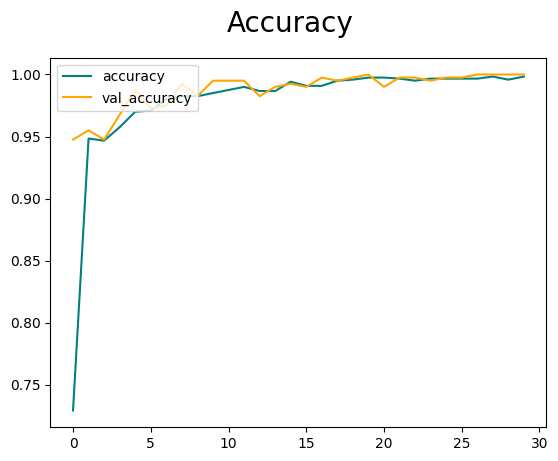

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

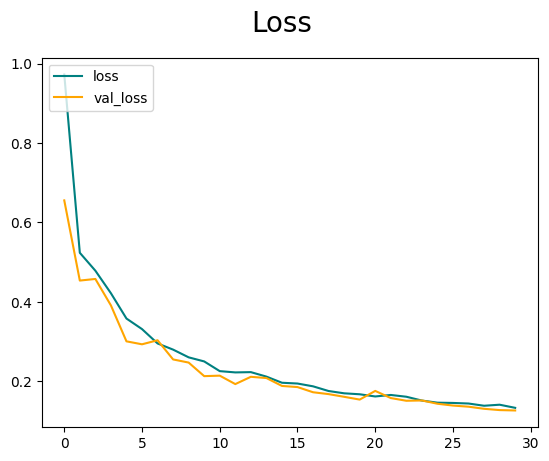

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [27]:
#TESTING
test_loss, test_acc = model.evaluate(test, verbose=1)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9974 - loss: 0.1331 
Test Accuracy: 0.9975369572639465
Test Loss: 0.1311129629611969
